# Covid-19 cases development in Czech Republic

Data from: https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19
Downloaded on: 22.04.2020

### Importing data
```python
head()
``` 
displays first 5 rows

In [6]:
import pandas as pd
cases = pd.read_csv('data/nakaza.csv')
display(cases.head())

,datum,pocet_den,pocet_celkem
0,2020-01-27,0,0
1,2020-01-28,0,0
2,2020-01-29,0,0
3,2020-01-30,0,0
4,2020-01-31,0,0


### Total cases plot

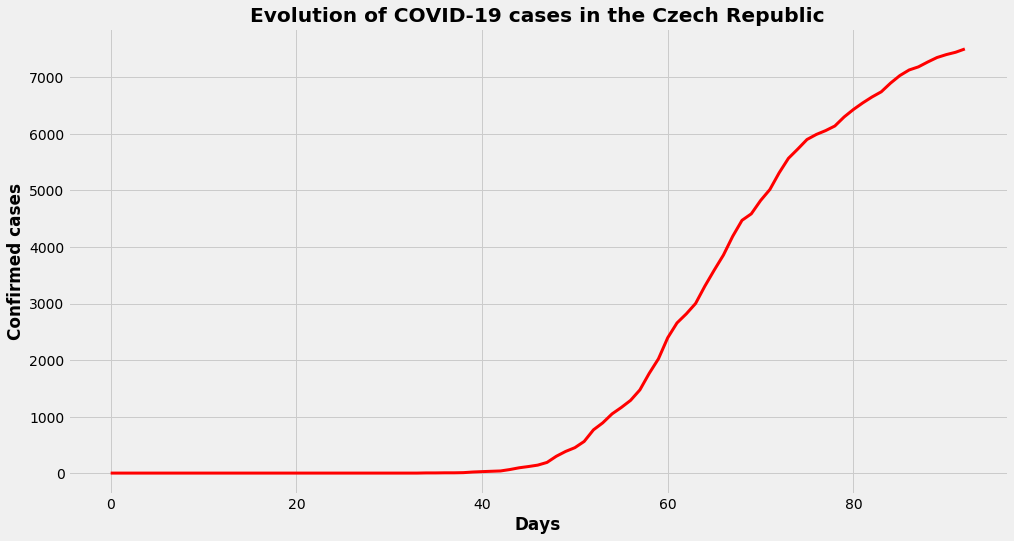

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random

cases = pd.read_csv('data/nakaza.csv')
days = list(range(0, len(cases)))
#print(days)
#display(cases)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(days, cases.pocet_celkem, label = "Number of cases", color="red", linewidth=3, linestyle='-')
plt.xlabel("Days", fontweight='bold')
plt.ylabel("Confirmed cases", fontweight='heavy')

plt.title('Evolution of COVID-19 cases in the Czech Republic', fontweight='heavy')
plt.show()

### New cases per day

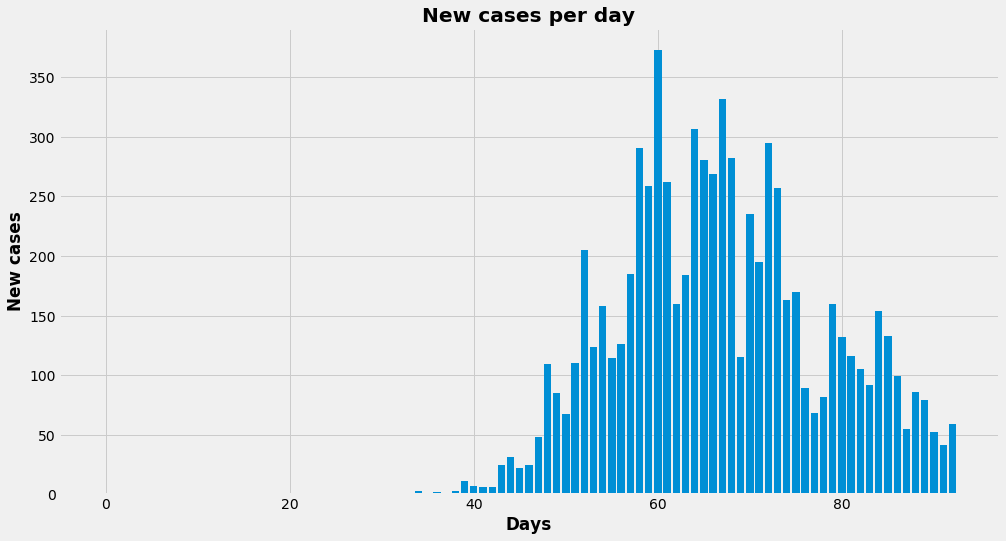

In [8]:
plt.figure(figsize = (15,8))
plt.bar(days, cases.pocet_den, alpha=1)
plt.xlabel("Days", fontweight='bold')
plt.ylabel("New cases", fontweight='bold')
plt.title("New cases per day", fontweight='bold')
plt.show()

### Total and new cases combined

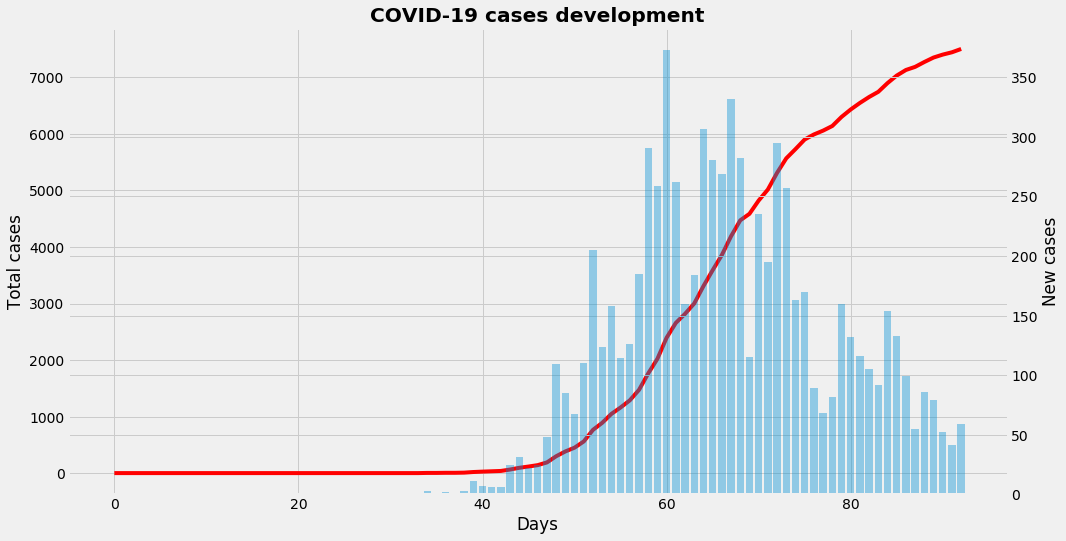

In [10]:
fig, ax1 = plt.subplots(figsize = (15,8))
plt.title("COVID-19 cases development", fontweight='heavy')

ax1.set_xlabel("Days")
ax1.set_ylabel("Total cases")
ax1.plot(days, cases.pocet_celkem, color='red')

ax2 = ax1.twinx()   # new axes, second one with shared x
ax2.set_ylabel("New cases")
ax2.bar(days, cases.pocet_den, alpha = 0.4)

plt.show()

### Combined graph with dates

This graph shows total number of cases and daily development (second y-axis) <br>
The x-axis is organised in weeks with according dates

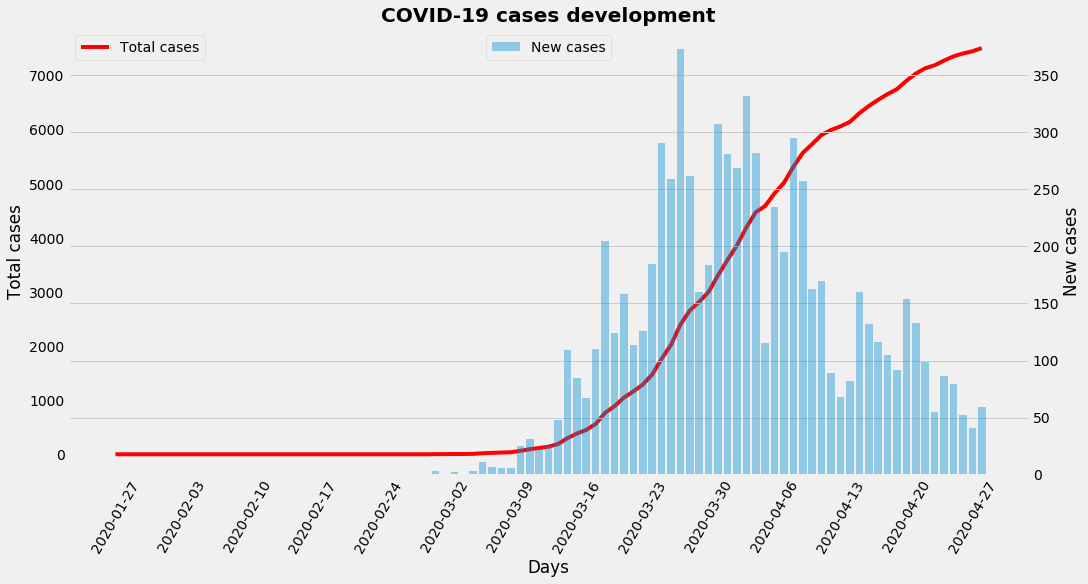

Data as of: 2020-04-28
New infections: 59
Total number of infected: 7504
Most infected in one day: 373
Most infections occured on: ['2020-03-27'](373)


In [92]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cases = pd.read_csv('data/nakaza.csv')
days = list(range(0, len(cases)))

# Create ticks=x-axis labels
# Start with first day from the datum column and interate by weeks
day_tick = []      # index of the date's row
day_tick_name = [] # date as string (cases.datum column)
i = 0
for day in cases.datum:
    if i%7==0:  # 7 days steps
        day_tick.append(i)
        day_tick_name.append(day)
    i = i+1    

# Plot settings
fig, ax1 = plt.subplots(figsize = (15,8), constrained_layout=True)   # constrained_layout=True needed, otherwise x-ticks cut
plt.title("COVID-19 cases development", fontweight='heavy')
plt.xticks(rotation =60)
plt.grid(b=None)

# Total cases plot
ax1.set_xlabel("Days")
ax1.set_ylabel("Total cases")
ax1.set_xticks(day_tick)
ax1.set_xticklabels(day_tick_name)
ax1.plot(days, cases.pocet_celkem, label='Total cases', color='red')
plt.legend()

# New cases plot
ax2 = ax1.twinx()   # new axes, second one with shared x
ax2.set_ylabel("New cases")
ax2.bar(days, cases.pocet_den, label='New cases', alpha = 0.4)
plt.legend(loc = 'upper center')

# Show and save the plot
plt.savefig("plots/combined-cases-graph.png", pad_inches=0.3)
plt.show()

# Statistics
dates = np.array(cases.datum)
new_infections = np.array(cases.pocet_den)
total_infections = np.array(cases.pocet_celkem)
print("Data as of: "+str(dates[-1]))  # last day
print("New infections: " + str(new_infections[-1]))
print("Total number of infected: " + str(total_infections[-1]))
print("Most infected in one day: " + str(max(new_infections)))
print("Most infections occured on: " + str(dates[new_infections == max(new_infections)]) + "("+ str(max(new_infections)) + ")")



### New cases per date

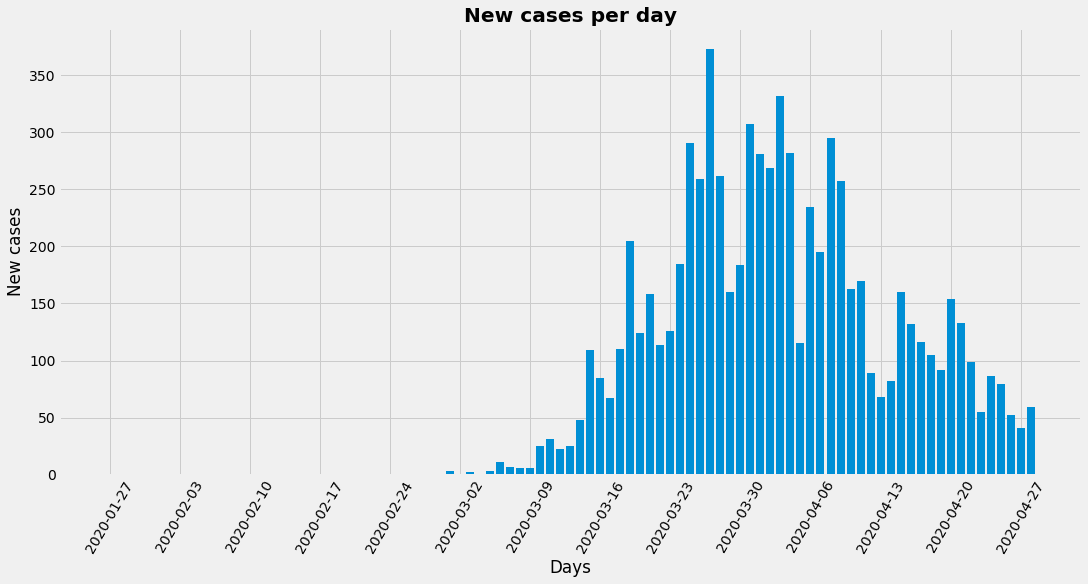

In [24]:
plt.figure(figsize = (15,8), constrained_layout = True)
plt.bar(days, cases.pocet_den, alpha=1)
plt.xlabel("Days", fontweight='normal')
plt.xticks(day_tick, day_tick_name, rotation = 60)

plt.ylabel("New cases", fontweight='normal')
plt.title("New cases per day", fontweight='bold')

plt.savefig("plots/new-cases-graph.png", pad_inches=0.3)
plt.show()

### Medical test capacity

COVID-19 tests done per day

        datum  testy_den  testy_celkem
0  2020-01-27         20            20
1  2020-01-28          8            28
2  2020-01-29          5            33
3  2020-01-30          1            34
4  2020-01-31          3            37


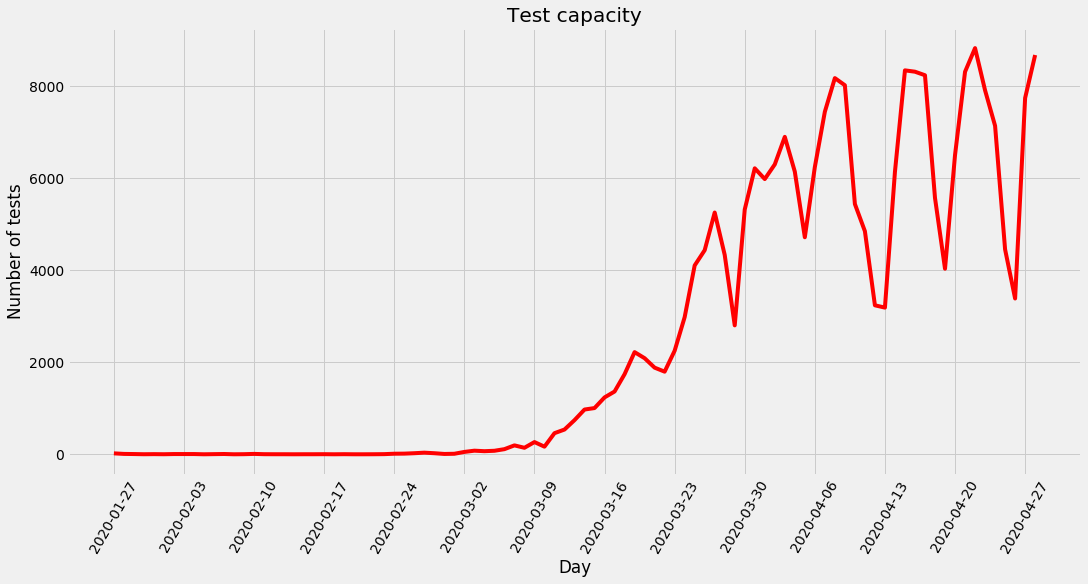

Tests done last day: 8665
Maximal tests done: 8815 on ['2020-04-22']


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
tests = pd.read_csv('data/testy.csv')
print(tests.head())

# Create ticks=x-axis labels
# Start with first day from the datum column and interate by weeks
days = list(range(0, len(tests)))
day_tick = []      # index of the date's row
day_tick_name = [] # date as string (cases.datum column)
i = 0
for day in tests.datum:
    if i%7==0:  # 7 days steps
        day_tick.append(i)
        day_tick_name.append(day)
    i = i+1  

# Plot
plt.figure(figsize = (15,8), constrained_layout = True)
plt.xticks(day_tick, day_tick_name)
plt.xticks(day_tick, day_tick_name, rotation = 60)

plt.plot(days, tests.testy_den, 'r')
plt.title("Test capacity")
plt.xlabel("Day")
plt.ylabel("Number of tests")

plt.savefig('plots/new_tests.png', pad_inches=0.3)
plt.show()

# Statistics
dates = np.array(tests.datum)
new_tests = np.array(tests.testy_den)
print("Tests done last day: " + str(new_tests[-1]))
print("Maximal tests done: " + str(max(new_tests)) +" on " + str(dates[new_tests == max(new_tests)]))

# Patients data

### Age of COVID-19 patients

Histogram parameters: <br>

- ```alpha``` :transparency <br>
- ``` rwidth``` : padding of the bars <br>
- ```bins = range(...)```: makes the bins the same as in xtics

  datum_hlaseni  vek pohlavi   kraj  nakaza_v_zahranici nakaza_zeme_csu_kod
0    2020-02-29   67       M  CZ010                 1.0                  IT
1    2020-03-01   21       Z  CZ010                 1.0                  IT
2    2020-02-29   20       Z  CZ010                 1.0                  IT
3    2020-03-03   41       Z  CZ010                 1.0                  IT
4    2020-03-03   44       M  CZ010                 1.0                  IT


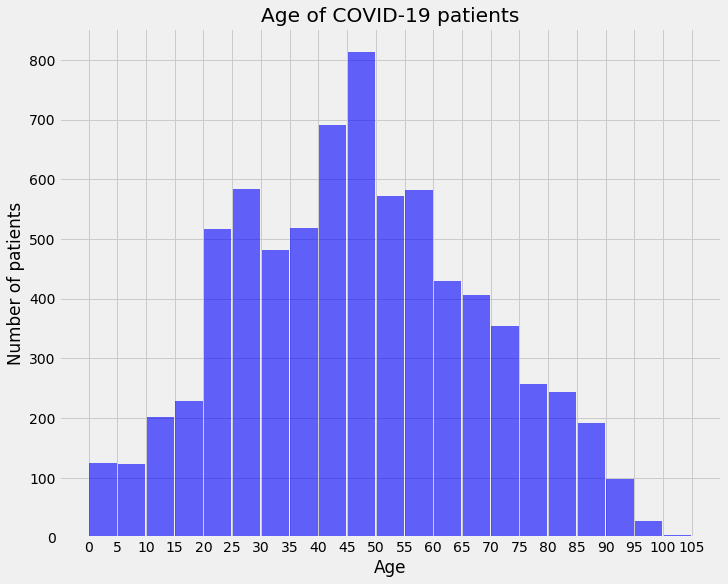

Mean age: 46.58613276001075
Age median: 46.58613276001075
Standard deviation: 21.02605621993926


In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

patients = pd.read_csv("data/osoby.csv")
print(patients.head())

age = np.array(patients.vek)

# Histogram
plt.figure(figsize = (10,8), constrained_layout = True)
age_resolution = 5
plt.xticks(list(range(0, 110, age_resolution)))   # create xticks (x-axis labels)

plt.hist(age, bins=range(0, 110, age_resolution), color='b', alpha = 0.6, rwidth=0.95)
#     alpha - transparency, rwidth - padding of the bars
#     bins = range(...) makes the bins the same as in xtics
plt.title("Age of COVID-19 patients")
plt.xlabel("Age")
plt.ylabel("Number of patients")

plt.savefig('plots/age.png')
plt.show()

# Statistics
mean = np.mean(age)
median = np.mean(age)
std = np.std(age)
print("Mean age: " + str(mean))
print("Age median: " + str(median))
print("Standard deviation: " + str(std))